# Project: Screening the polymer flooding using artificial-neural-network(ANN)
# Code implementation

## *Authors: Aibek Mukhtarov, Olzhas Shortanbaiuly*

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 0. Importing data

In [2]:
# importing data

data = pd.read_excel('https://github.com/olzhasshortanbaiuly/PETE601_FinalProject/raw/main/dataset_pete601.xlsx')
data.head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
0,"6,200","2,200","1,000",35,"1,000-3,000","300-1,400",13-14,"1,500-4,000",95,75,20,"33,000","33,000"
1,60,163,62,60,1-5,"1,000-1,800",28-30,2-50,110,45,20,"5,000","1,500"
2,574,376,68,32,"200-2,500","825-1,650",12-13,"2,000-10,000",84-98,60,10,"4,611","4,611"
3,290,95,20,34,"800-1,000","650-1,000",9-10,"11,500-28,000",84,55,10,"1,692","1,692"
4,600,162,147,36,"1,000-3,000","1,000",11-14,"1,000-2,000",95-105,65,20,"3,500","3,500"


In [3]:
# column names

data.columns

Index(['Area, acres', 'Production wells', 'Injection wells', 'Porosity, %',
       'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F',
       'Initial oil saturation, %', 'End oil saturation, %', 'Tot. prod., b/d',
       'Enh. prod., b/d'],
      dtype='object')

In [4]:
# shape of the data

data.shape

(698, 13)

# 1. Data preprocessing

## 1.1 Data cleaning

In [5]:
# dropping the rows with any NaN values
data = data.dropna(axis = 0, how = 'any')
data.shape

(675, 13)

In [6]:
# dropping duplicates

data.drop_duplicates(inplace=True)
data.shape

(651, 13)

In [7]:
for col in data.columns:
  print(col)

Area, acres
Production wells
Injection wells
Porosity, %
Permeability, mD
Depth, ft
Gravity, °API
Oil, cp
Oil, °F
Initial oil saturation, %
End oil saturation, %
Tot. prod., b/d
Enh. prod., b/d


In [8]:
#get the all possible unique values for each of the data columns

for col in data.columns:
  print(col + ' has this unique values: ')
  print(data[col].unique())

Area, acres has this unique values: 
['6,200' '60' '574' '290' '600' '100' '170' '160' '1,230' '15' '50' '66'
 '152' '125' '546' '552' '1,214' '80' '1,200' '1,291' '9,660' '20' '30'
 '90' '94' '3,380' '300' '320' '44' '37' '700' '780' '8,960' '3,500' '5'
 '25' '569' '8,559' '1,100' '2,320' '2,500' '18,000' '3,600' '5,500'
 '1,084' '4,900' '285' '120' '85' '70' '200' '190' '840' '3,398' '8,240'
 '280' '212' '12,600' '4,100' '2,600' '1,800' '10,800' '880' '10,104'
 '1,020' '13,440' '8,500' '1,120' '340' '4,392' '650' '15,699' '500' '480'
 0 '49,900' '1,345' '790' '1,400' '810' '3,400' '10' '1,953' '246' '4,437'
 '2,870' '6,000' '1,600' '1,143' '1,235' '1,179' '1,326' '1,155' '1,280'
 '3,100' '2,090' '12,000' '1,240' '5,700' '1,048' '1,204' '1,160' '1,700'
 '1,780' '27,848' '7,800' '240' '6,183' '2,010' '16,300' '11,000' '7,000'
 '330' '2,084' '1,923' '640' '98' '2,100' '180' '26,000' '55,000' '4,000'
 '10,000' '9,000' '5,000' '6,240' '204' '70,000' '2,400' '40,000' '20,000'
 '14,415' '2,

In [9]:
# Cleaning the data with extra text and the data given as interval values

import re

def process_value(value):
    # If the value is already numeric, return as is
    if isinstance(value, (float, int)):
        return value

    # Convert the value to a string and remove commas and spaces
    value_str = re.sub(r'[, ]+', '', str(value))

    # Replace various dash types with a standard hyphen
    value_str = value_str.replace('–', '-').replace('—', '-')

    # Remove 'ft' or similar units if present
    value_str = re.sub(r'[^\d.-]+', '', value_str)

    # Check if there is a hyphen indicating a range
    if '-' in value_str:
        try:
            # Split the value on hyphen to get the start and end of the range
            start_str, end_str = value_str.split('-')
            # Handle cases like '1,000-5,000+'
            end_str = end_str.rstrip('+')
            # Convert both sides to float and compute the average
            start, end = float(start_str), float(end_str)
            return (start + end) / 2
        except ValueError:
            # If conversion fails, return NaN
            return np.nan

    # Attempt to convert to float if there is no hyphen
    try:
        # Handle cases like '5,000+'
        value_str = value_str.rstrip('+')
        return float(value_str)
    except ValueError:
        # If conversion fails, return NaN
        return np.nan

def process_dataframe_or_column(data, columns=None):
    # If columns are provided, only process those
    if columns is not None:
        for col in columns:
            data[col] = data[col].apply(process_value)
    else:
        # Apply to all columns if no specific columns are provided
        for col in data.columns:
            # Apply only to columns with string type
            if data[col].dtype == object:
                data[col] = data[col].apply(process_value)
    return data

# Apply the processing to the entire dataframe
data = process_dataframe_or_column(data)
data = data.dropna(axis = 0, how = 'any') # drop NaN
data.shape

(650, 13)

In [10]:
# Check the unique values again and check validity of the data cleaning results
for col in data.columns:
    print(col + ' has these unique values: ')
    print(data[col].unique())

Area, acres has these unique values: 
[6.2000e+03 6.0000e+01 5.7400e+02 2.9000e+02 6.0000e+02 1.0000e+02
 1.7000e+02 1.6000e+02 1.2300e+03 1.5000e+01 5.0000e+01 6.6000e+01
 1.5200e+02 1.2500e+02 5.4600e+02 5.5200e+02 1.2140e+03 8.0000e+01
 1.2000e+03 1.2910e+03 9.6600e+03 2.0000e+01 3.0000e+01 9.0000e+01
 9.4000e+01 3.3800e+03 3.0000e+02 3.2000e+02 4.4000e+01 3.7000e+01
 7.0000e+02 7.8000e+02 8.9600e+03 3.5000e+03 5.0000e+00 2.5000e+01
 5.6900e+02 8.5590e+03 1.1000e+03 2.3200e+03 2.5000e+03 1.8000e+04
 3.6000e+03 5.5000e+03 1.0840e+03 4.9000e+03 2.8500e+02 1.2000e+02
 8.5000e+01 7.0000e+01 2.0000e+02 1.9000e+02 8.4000e+02 3.3980e+03
 8.2400e+03 2.8000e+02 2.1200e+02 1.2600e+04 4.1000e+03 2.6000e+03
 1.8000e+03 1.0800e+04 8.8000e+02 1.0104e+04 1.0200e+03 1.3440e+04
 8.5000e+03 1.1200e+03 3.4000e+02 4.3920e+03 6.5000e+02 1.5699e+04
 5.0000e+02 4.8000e+02 0.0000e+00 4.9900e+04 1.3450e+03 7.9000e+02
 1.4000e+03 8.1000e+02 3.4000e+03 1.0000e+01 1.9530e+03 2.4600e+02
 4.4370e+03 2.8700e+03 6

In [11]:
# Dropping inconsistent data where initial oil saturation < 20%

data = data[data['Initial oil saturation, %'] >= 20]
data.shape

(548, 13)

In [12]:
# Dropping inconsistent data where end oil saturation > initial oil saturation (start)

data = data[data['Initial oil saturation, %'] >= data['End oil saturation, %']]
data.shape

(548, 13)

In [13]:
# Dropping inconsistent data where permeability < 0.1 mD

data = data[data['Permeability, mD'] >= 0.1]
data.shape

(522, 13)

In [14]:
# Dropping inconsistent data where porosity > 40%

data = data[data['Porosity, %'] <= 40]
data.shape

(515, 13)

## 1.2 Data visualization

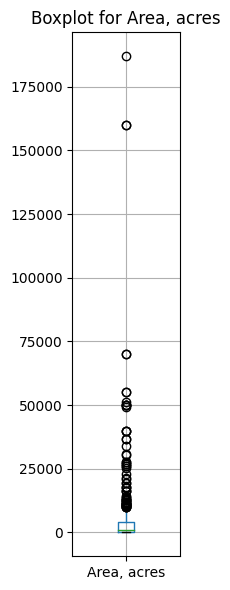

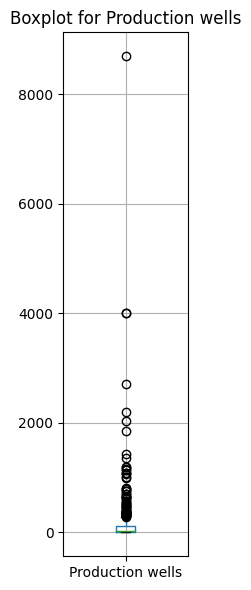

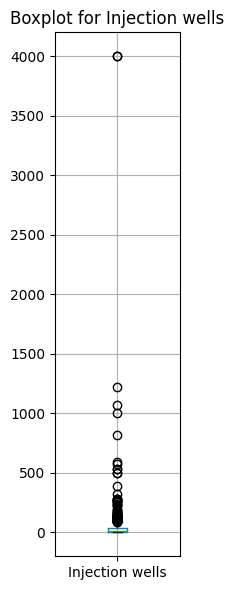

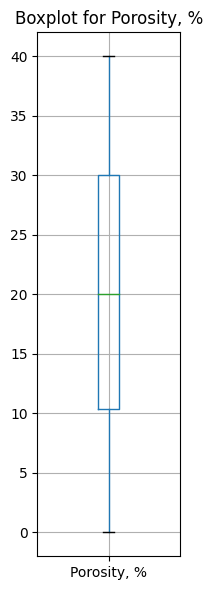

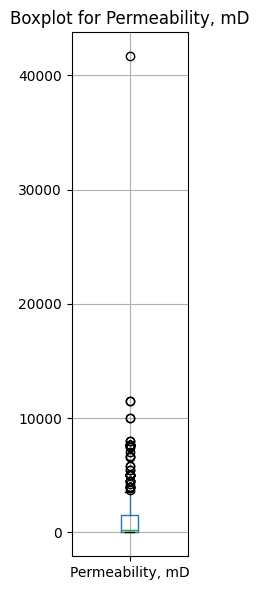

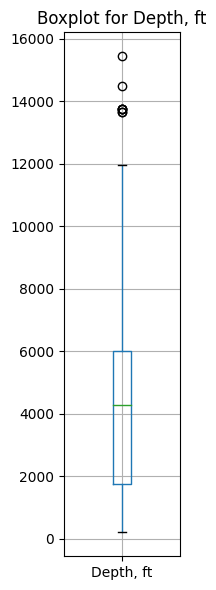

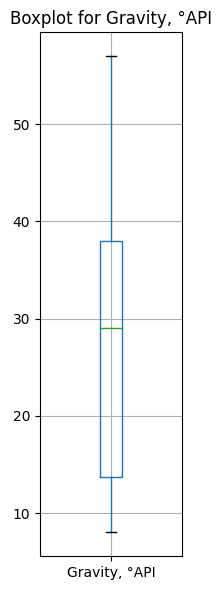

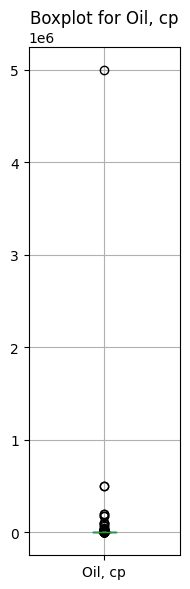

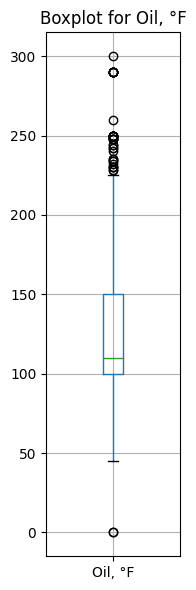

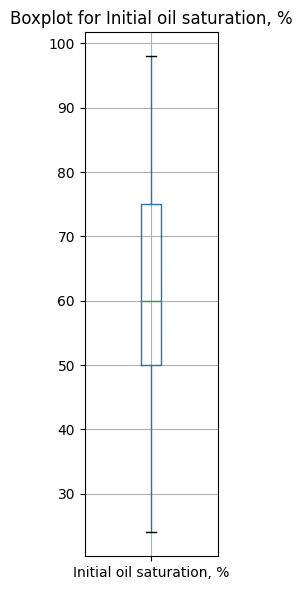

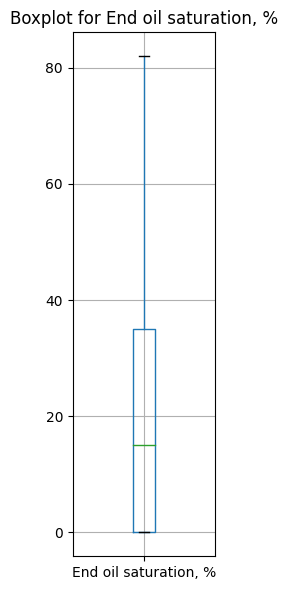

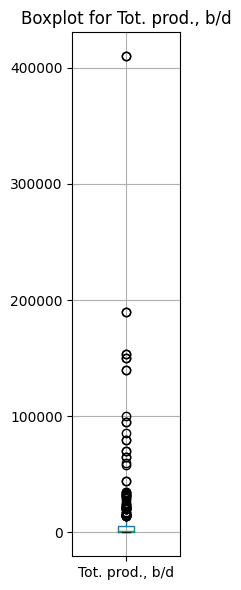

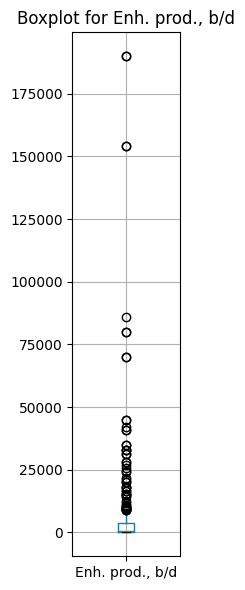

In [15]:
for col in data.columns:
  data[[col]].boxplot(figsize=(2,6))
  plt.title("Boxplot for {}".format(col))
  plt.tight_layout()
  plt.show()

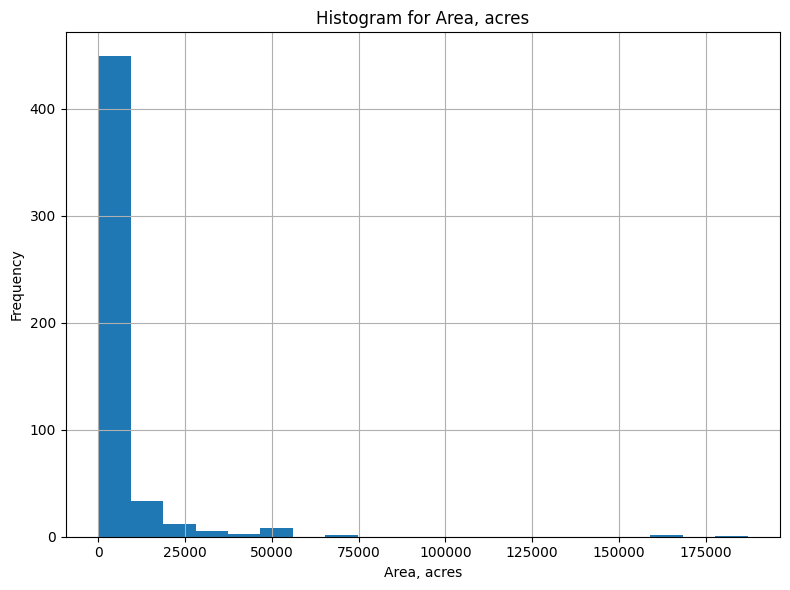

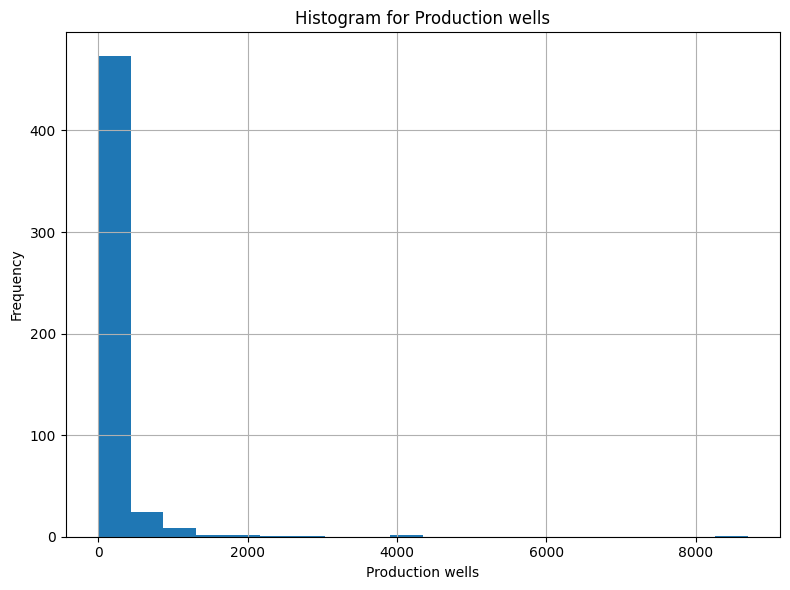

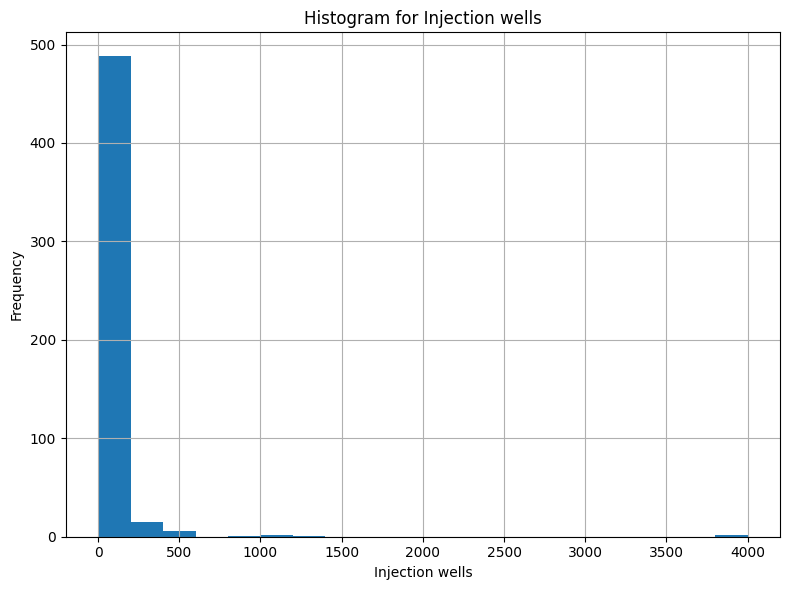

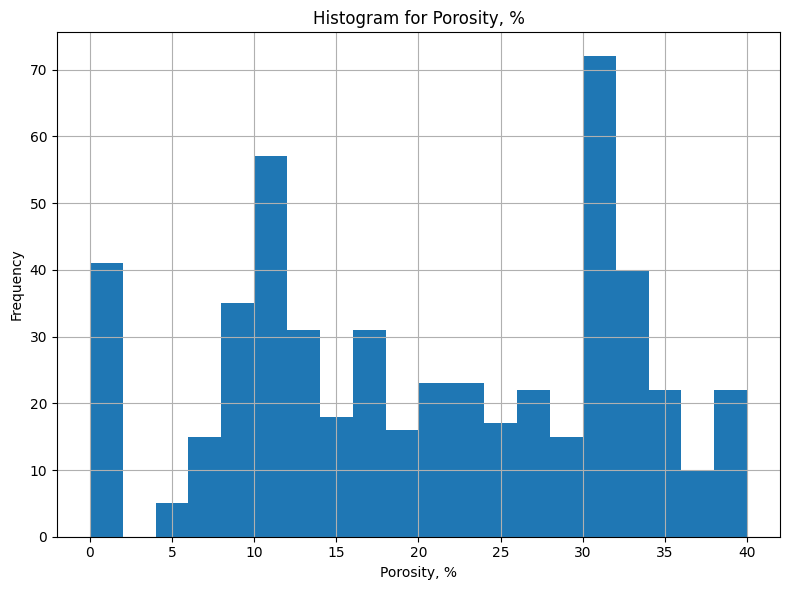

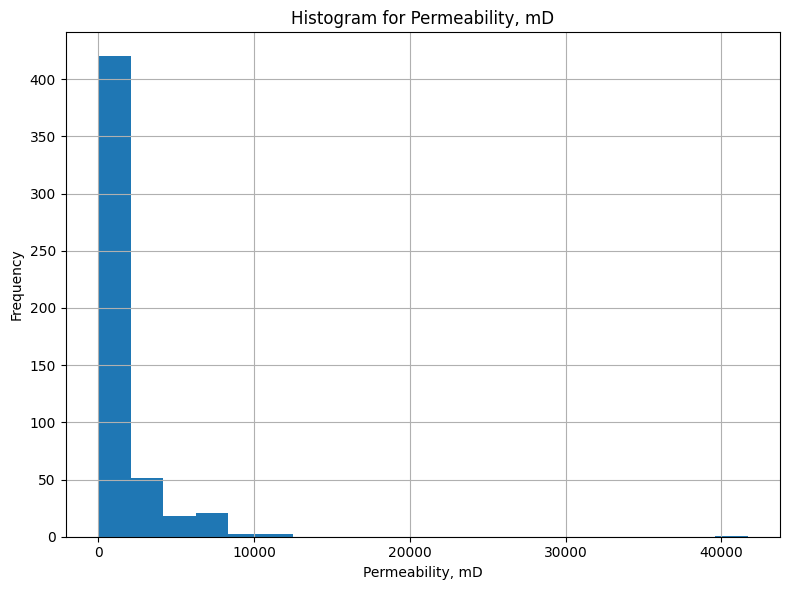

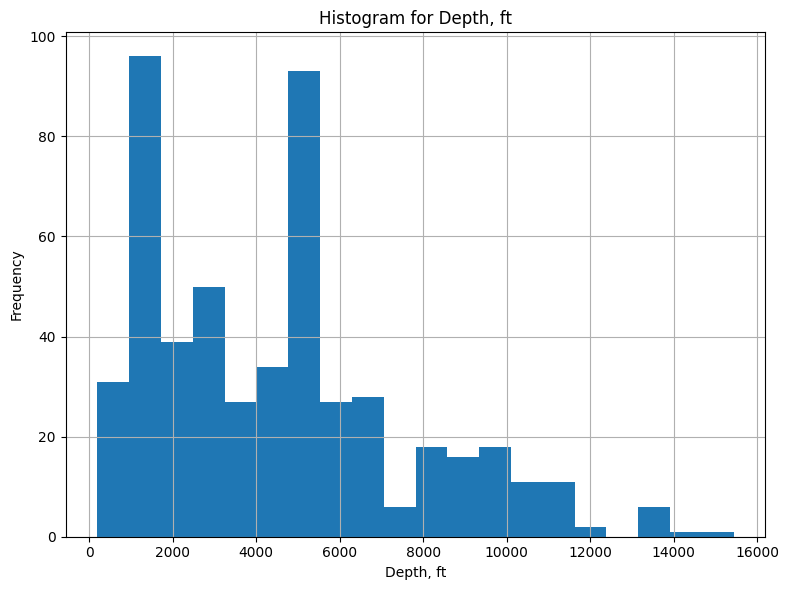

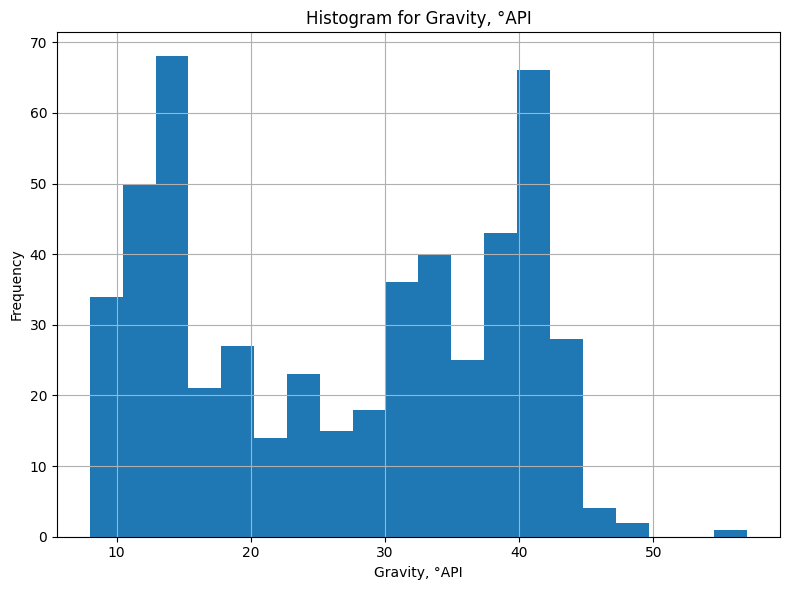

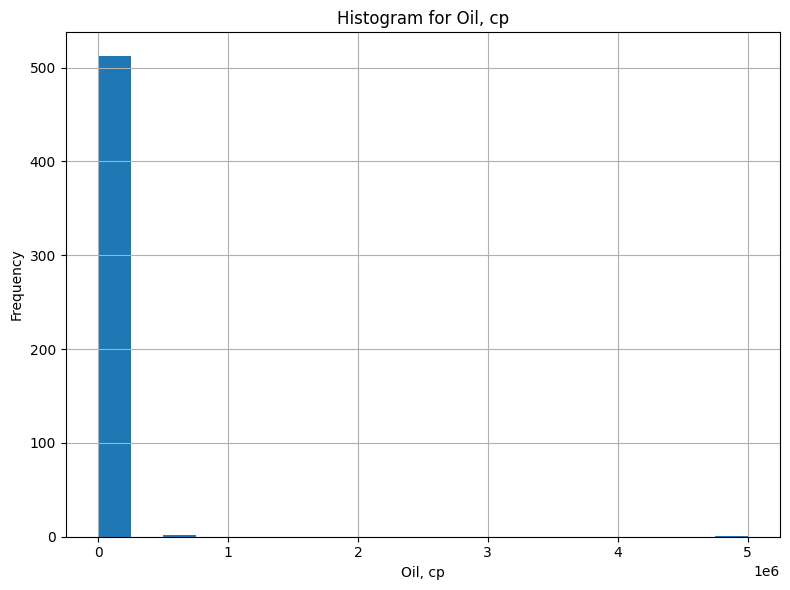

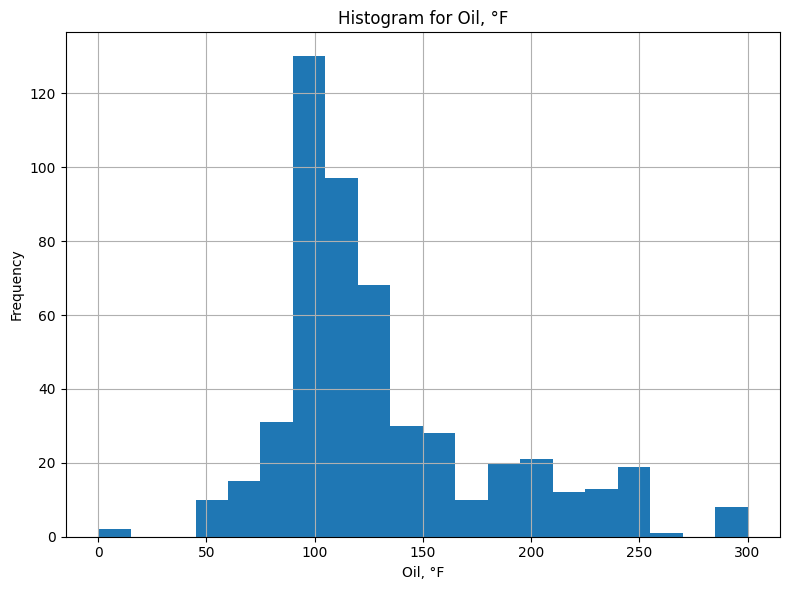

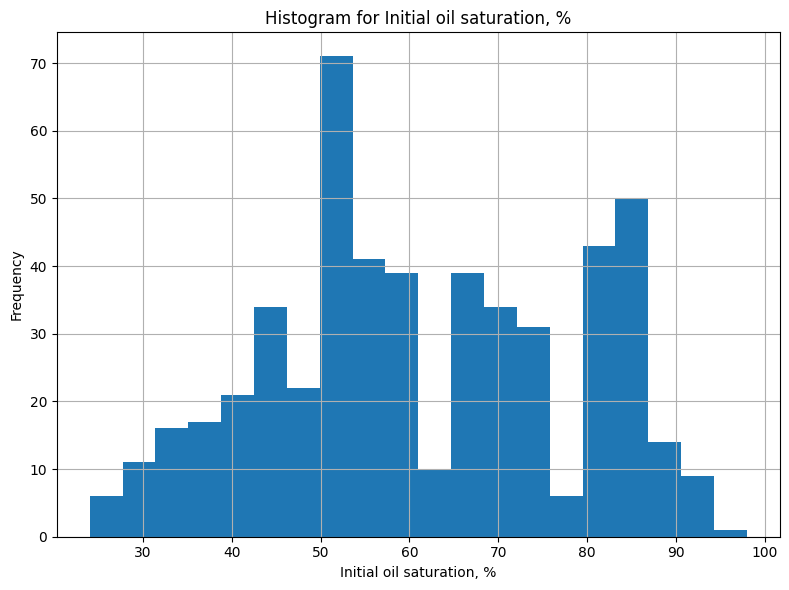

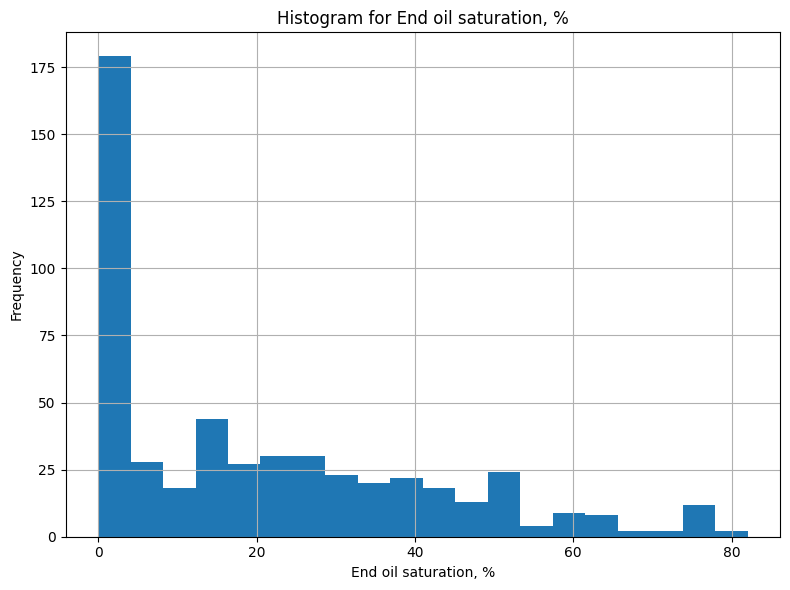

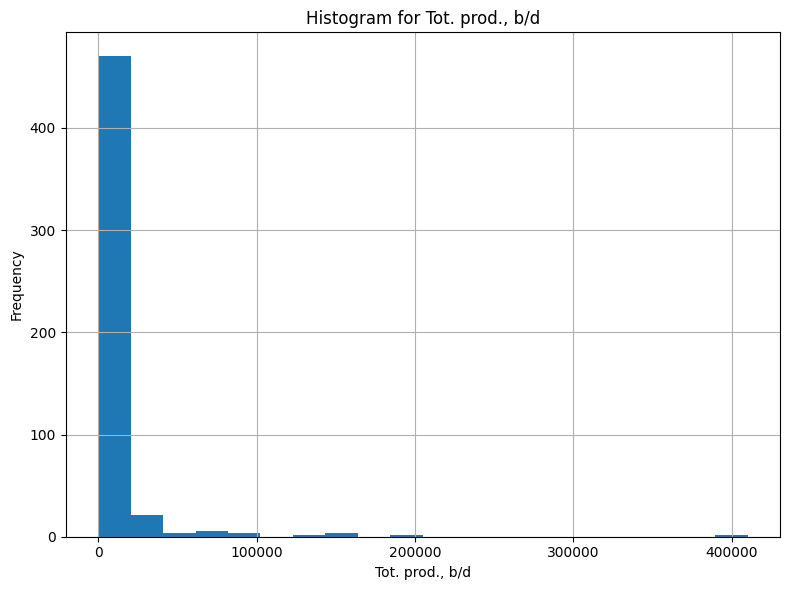

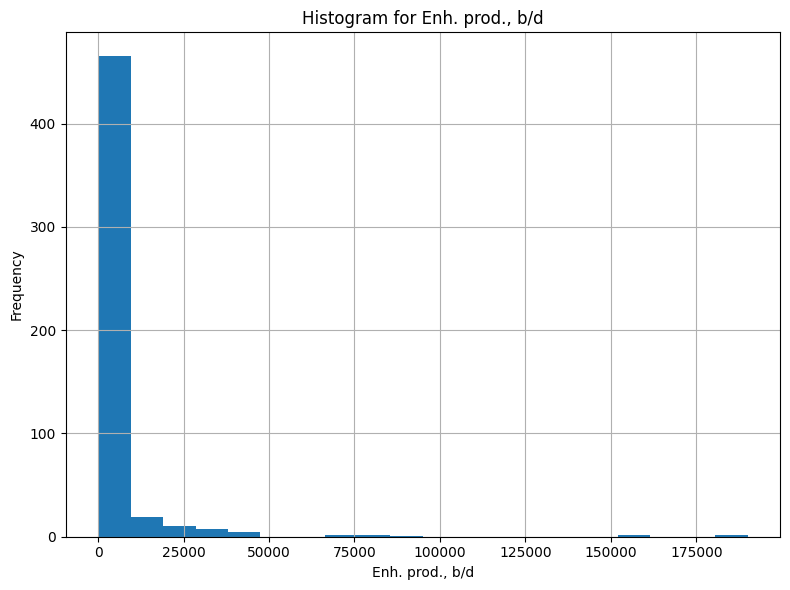

In [16]:
for col in data.columns:
  data[[col]].hist(bins = 20, figsize=(8,6))
  plt.title("Histogram for {}".format(col))
  plt.xlabel("{}".format(col))
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

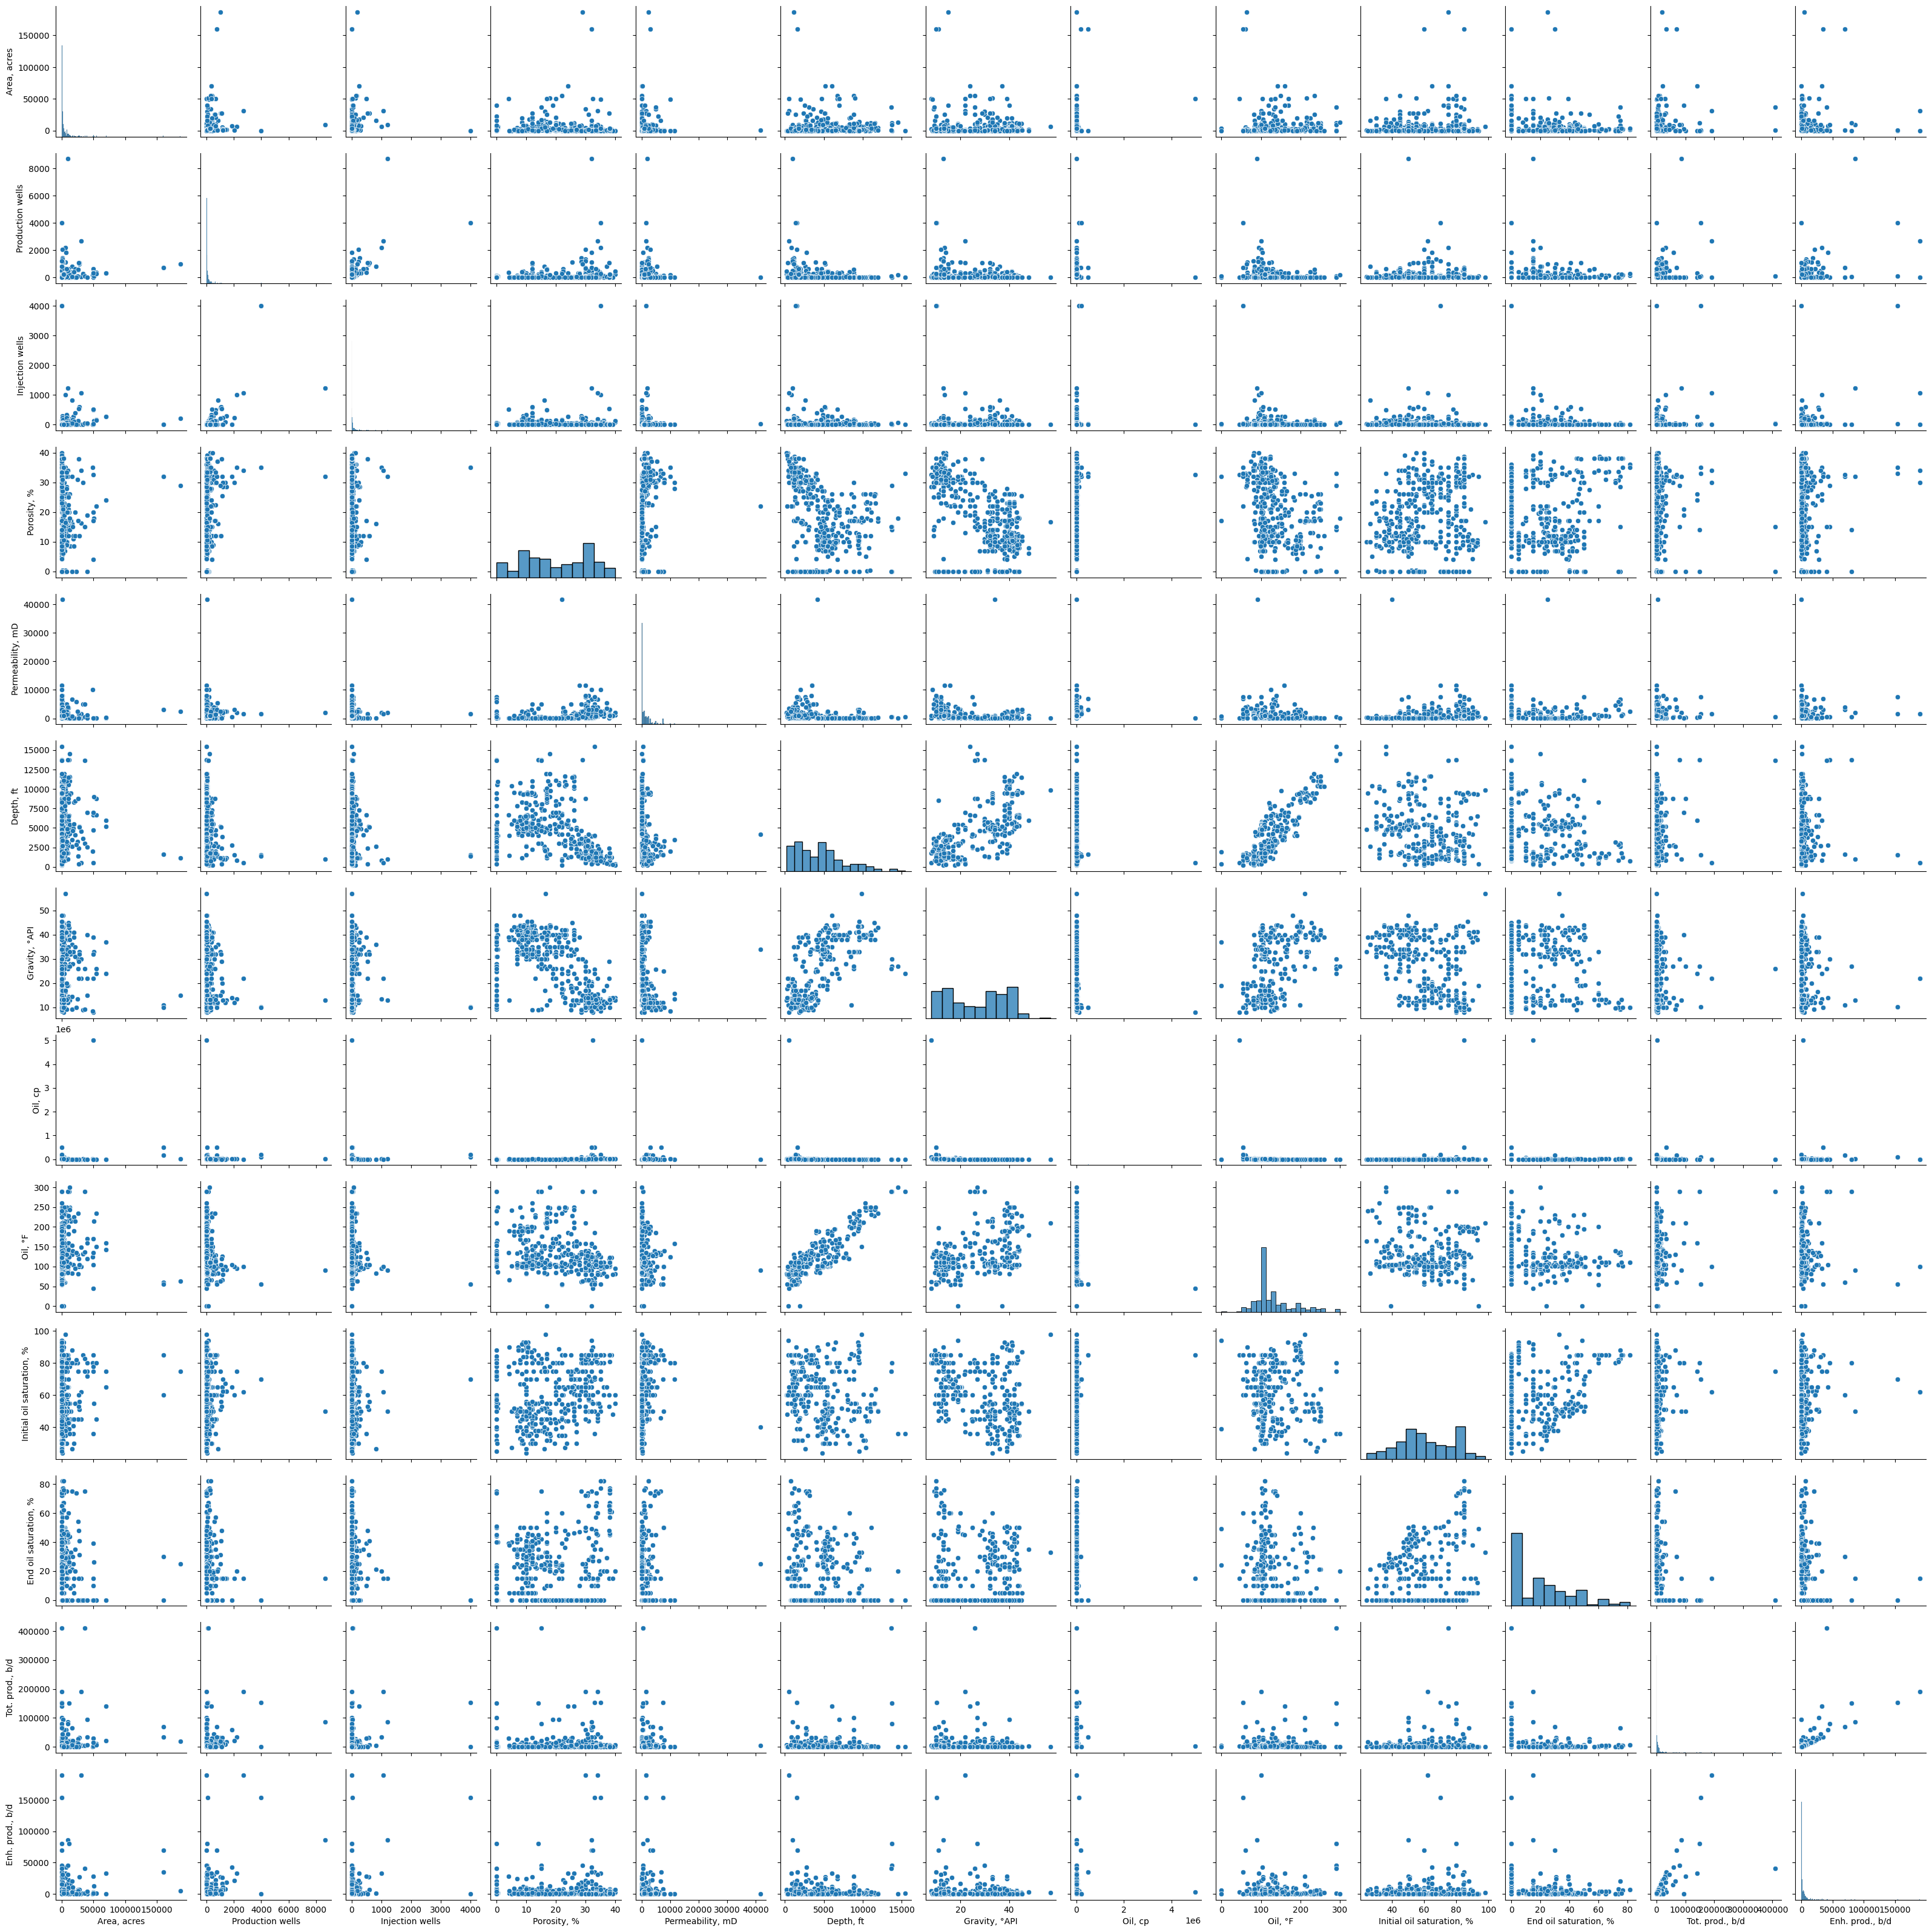

In [ ]:
sns.pairplot(data)

## 1.3 Checking extreme noise values

In [17]:
data[data['Area, acres'] >= 150000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
211,160000.0,750.0,0.0,32.0,3000.0,1600.0,11.0,170000.0,60.0,60.0,30.0,70000.0,70000.0
597,160000.0,750.0,0.0,32.0,3000.0,1600.0,10.0,500000.0,55.0,85.0,0.0,35000.0,35000.0
606,187000.0,1000.0,200.0,29.0,2500.0,1150.0,15.0,3000.0,63.0,75.0,25.0,20105.0,5000.0


In [18]:
data[data['Permeability, mD'] >= 35000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
503,1155.0,26.0,16.0,22.0,41675.0,4200.0,34.0,1.5,91.0,40.0,25.0,5090.0,64.0


In [19]:
data[data['Tot. prod., b/d'] >= 35000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
32,9660.0,8692.0,1219.0,32.0,2000.0,1000.0,13.0,4000.00,90.0,50.0,15.0,86000.0,86000.0
158,0.0,0.0,0.0,0.0,400.0,8800.0,27.0,0.90,210.0,50.0,0.0,100000.0,28000.0
167,20.0,3.0,3.0,26.0,275.0,6000.0,24.0,2.00,160.0,75.0,0.0,140000.0,33000.0
169,2400.0,29.0,11.0,21.0,20.0,7000.0,40.0,0.45,160.0,80.0,0.0,95000.0,0.0
211,160000.0,750.0,0.0,32.0,3000.0,1600.0,11.0,170000.00,60.0,60.0,30.0,70000.0,70000.0


In [20]:
data[data['Oil, cp'] >= 4000000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
212,50000.0,3.0,3.0,32.5,5.05,500.0,8.0,5000000.0,45.0,85.0,15.0,2750.0,2750.0


In [21]:
data[data['Enh. prod., b/d'] >= 150000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
216,0.0,4000.0,4000.0,35.0,1500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
282,30878.0,2702.0,1068.0,34.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0
600,400.0,102.0,27.0,33.0,7500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
627,58.0,9.0,1.0,30.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0


In [22]:
data.columns

Index(['Area, acres', 'Production wells', 'Injection wells', 'Porosity, %',
       'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F',
       'Initial oil saturation, %', 'End oil saturation, %', 'Tot. prod., b/d',
       'Enh. prod., b/d'],
      dtype='object')

## 1.4 Exporting clean dataset

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/PETE 601/dataset_pete601_processed.xlsx'  # specify your path here
data.to_excel(path, index=False)

# 2. Model implementation

## 2.1 Forward-looking ANN

In [23]:
from sklearn.model_selection import train_test_split
import math

Epoch 1/100
13/13 [==============================] - 3s 94ms/step - loss: 1409452032.0000 - mean_absolute_error: 8829.0303 - val_loss: 412479296.0000 - val_mean_absolute_error: 6426.9561
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 1152132224.0000 - mean_absolute_error: 8395.4902 - val_loss: 408418016.0000 - val_mean_absolute_error: 6461.4199
Epoch 3/100
13/13 [==============================] - 0s 23ms/step - loss: 1053027456.0000 - mean_absolute_error: 8242.1514 - val_loss: 405573728.0000 - val_mean_absolute_error: 6641.0435
Epoch 4/100
13/13 [==============================] - 0s 16ms/step - loss: 917159936.0000 - mean_absolute_error: 7939.5605 - val_loss: 405842656.0000 - val_mean_absolute_error: 6926.8862
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 891904384.0000 - mean_absolute_error: 7933.7393 - val_loss: 408298144.0000 - val_mean_absolute_error: 7225.3433
Epoch 6/100
13/13 [==============================] - 0s 11ms/step -

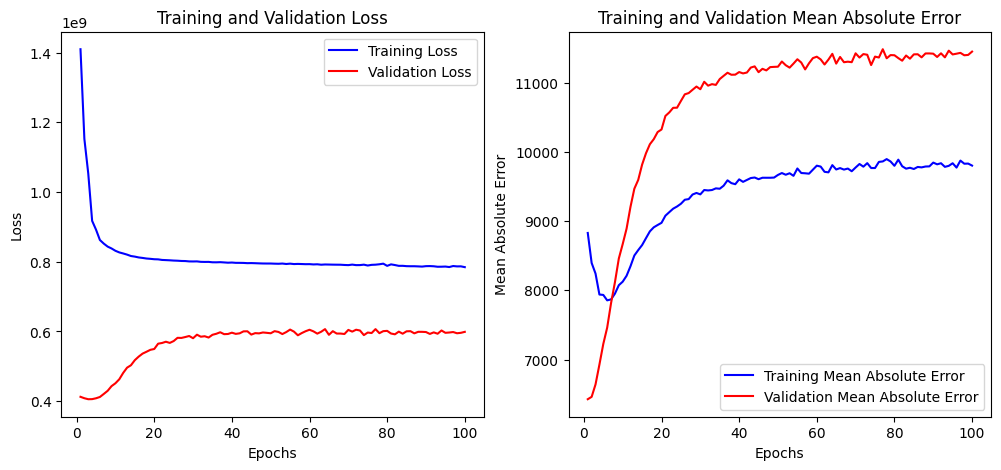

In [24]:
X_ = data[['Area, acres', 'Porosity, %', 'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y_ = data[['Tot. prod., b/d', 'Enh. prod., b/d']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train_, X_temp_, y_train_, y_temp_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_temp_, y_temp_, test_size=0.5, random_state=42)

# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
              metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history = model.fit(X_train_, y_train_, epochs=100, batch_size=32, validation_data=(X_val_, y_val_))

# Plotting
loss_ = history.history['loss']
val_loss_ = history.history['val_loss']
metric_ = history.history['mean_absolute_error']
val_metric_ = history.history['val_mean_absolute_error']
epochs = range(1, len(loss_) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs, metric_, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs, val_metric_, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [25]:
model.evaluate(X_test_, y_test_)

2/2 [==============================] - 0s 8ms/step - loss: 124858464.0000 - mean_absolute_error: 6245.9058


[124858464.0, 6245.90576171875]

### 2.1.0 Data normalization

In [26]:
def normalize_column(column):
    """Normalize a Pandas series using min-max scaling."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Normalize each column in the dataframe
data = data.apply(normalize_column)
data.head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
0,0.033155,0.253106,0.25000,0.875,0.047956,0.042651,0.112245,0.00055,0.316667,0.689189,0.243902,0.080488,0.173684
2,0.003070,0.043258,0.01700,0.800,0.032359,0.068077,0.091837,0.00120,0.303333,0.486486,0.121951,0.011246,0.024268
3,0.001551,0.010930,0.00500,0.850,0.021560,0.041010,0.030612,0.00395,0.280000,0.418919,0.121951,0.004127,0.008905
4,0.003209,0.018638,0.03675,0.900,0.047956,0.052493,0.091837,0.00030,0.333333,0.554054,0.243902,0.008537,0.018421
5,0.000535,0.028302,0.02150,1.000,0.027559,0.009843,0.122449,0.00055,0.316667,0.418919,0.243902,0.005366,0.011579


### 2.1.1 Original model

Epoch 1/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0136 - mean_absolute_error: 0.0668 - val_loss: 0.0065 - val_mean_absolute_error: 0.0552
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0513 - val_loss: 0.0056 - val_mean_absolute_error: 0.0477
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0446 - val_loss: 0.0050 - val_mean_absolute_error: 0.0451
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0450 - val_loss: 0.0047 - val_mean_absolute_error: 0.0433
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0415 - val_loss: 0.0046 - val_mean_absolute_error: 0.0445
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0418 - val_loss: 0.0044 - val_mean_absolute_error: 0.0405
Epoch 7/100
13/13 [==

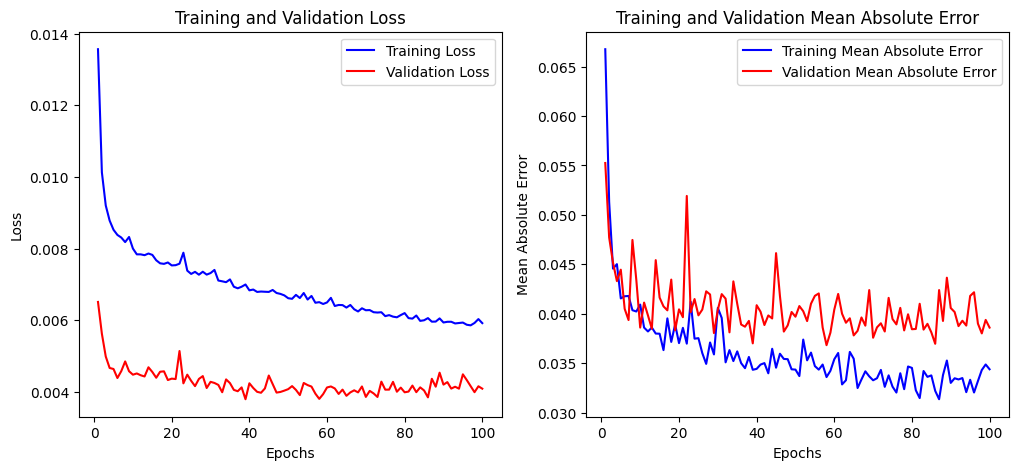

In [27]:
X = data[['Area, acres', 'Porosity, %', 'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y = data[['Tot. prod., b/d', 'Enh. prod., b/d']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Defining the model
forward_model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward = forward_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss = history_forward.history['loss']
val_loss = history_forward.history['val_loss']
metric = history_forward.history['mean_absolute_error']
val_metric = history_forward.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs, metric, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs, val_metric, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [28]:
forward_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0283


[0.0025051357224583626, 0.02832612581551075]

### 2.1.2 Model with decreased learning rate

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0679 - val_loss: 0.0080 - val_mean_absolute_error: 0.0542
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0573 - val_loss: 0.0072 - val_mean_absolute_error: 0.0566
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0513 - val_loss: 0.0062 - val_mean_absolute_error: 0.0466
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0433 - val_loss: 0.0058 - val_mean_absolute_error: 0.0456
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0433 - val_loss: 0.0055 - val_mean_absolute_error: 0.0458
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0405 - val_loss: 0.0052 - val_mean_absolute_error: 0.0431
Epoch 7/100
13/13 [==

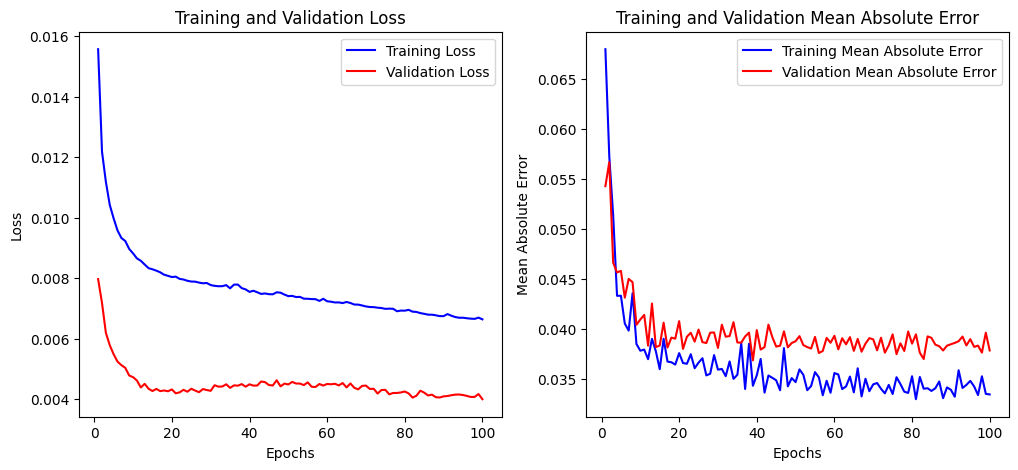

In [29]:
from tensorflow.keras.optimizers import Adam

# Defining the model
forward_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.0005)
forward_model1.compile(optimizer=optimizer,
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward1 = forward_model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss1 = history_forward1.history['loss']
val_loss1 = history_forward1.history['val_loss']
metric1 = history_forward1.history['mean_absolute_error']
val_metric1 = history_forward1.history['val_mean_absolute_error']
epochs1 = range(1, len(loss1) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs1, loss1, 'b-', label='Training Loss')
plt.plot(epochs1, val_loss1, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs1, metric1, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs1, val_metric1, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [30]:
forward_model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0251


[0.0019931020215153694, 0.0250624418258667]

### 2.1.3 Model with increased learning rate

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0675 - val_loss: 0.0047 - val_mean_absolute_error: 0.0527
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0455 - val_loss: 0.0047 - val_mean_absolute_error: 0.0429
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0431 - val_loss: 0.0042 - val_mean_absolute_error: 0.0370
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0408 - val_loss: 0.0042 - val_mean_absolute_error: 0.0373
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0353 - val_loss: 0.0045 - val_mean_absolute_error: 0.0431
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0367 - val_loss: 0.0050 - val_mean_absolute_error: 0.0475
Epoch 7/100
13/13 [==

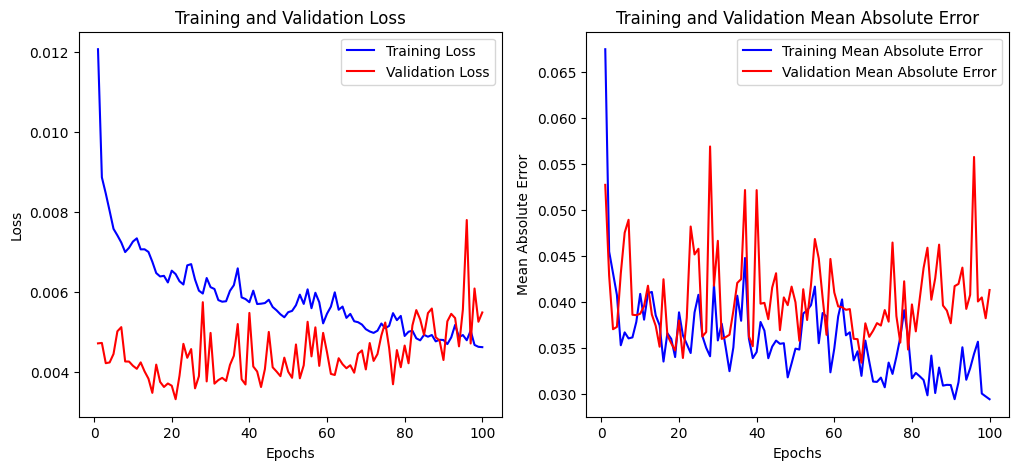

In [31]:
from tensorflow.keras.optimizers import Adam

# Defining the model
forward_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer2 = Adam(learning_rate=0.005)
forward_model2.compile(optimizer=optimizer2,
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward2 = forward_model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss2 = history_forward2.history['loss']
val_loss2 = history_forward2.history['val_loss']
metric2 = history_forward2.history['mean_absolute_error']
val_metric2 = history_forward2.history['val_mean_absolute_error']
epochs2 = range(1, len(loss2) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs2, loss2, 'b-', label='Training Loss')
plt.plot(epochs2, val_loss2, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs2, metric2, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs2, val_metric2, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [32]:
forward_model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - mean_absolute_error: 0.0270


[0.002455845009535551, 0.027021663263440132]

### 2.1.4 Model with Dropout Layer

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.1428 - val_loss: 0.0091 - val_mean_absolute_error: 0.0723
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.1105 - val_loss: 0.0067 - val_mean_absolute_error: 0.0562
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0940 - val_loss: 0.0054 - val_mean_absolute_error: 0.0510
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0835 - val_loss: 0.0052 - val_mean_absolute_error: 0.0483
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0830 - val_loss: 0.0051 - val_mean_absolute_error: 0.0461
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0751 - val_loss: 0.0050 - val_mean_absolute_error: 0.0430
Epoch 7/100
13/13 [==

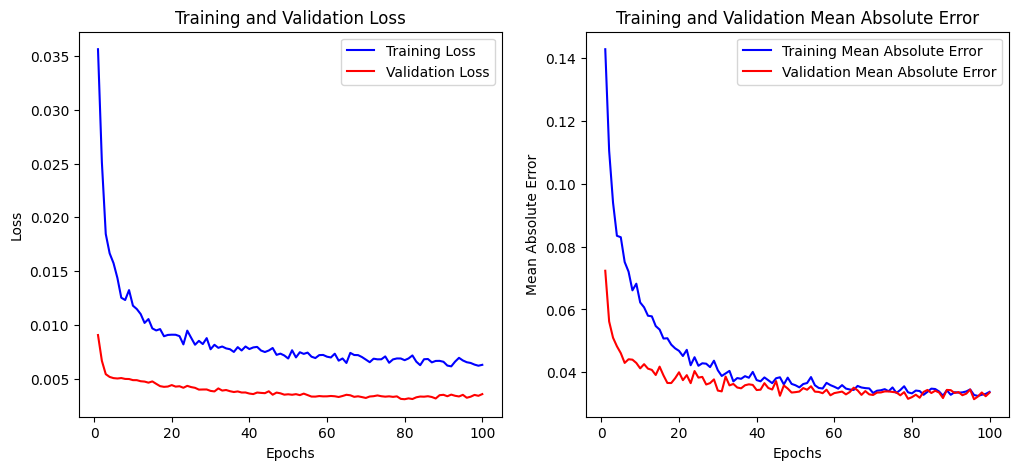

In [33]:
# Defining the model
forward_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model3.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward3 = forward_model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss3 = history_forward3.history['loss']
val_loss3 = history_forward3.history['val_loss']
metric3 = history_forward3.history['mean_absolute_error']
val_metric3 = history_forward3.history['val_mean_absolute_error']
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs3, loss3, 'b-', label='Training Loss')
plt.plot(epochs3, val_loss3, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs3, metric3, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs3, val_metric3, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [34]:
forward_model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0237


[0.0017573204822838306, 0.023675968870520592]

### 2.1.5 Model with Additional Hidden Layer

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0972 - val_loss: 0.0104 - val_mean_absolute_error: 0.0749
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0637 - val_loss: 0.0052 - val_mean_absolute_error: 0.0500
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0419 - val_loss: 0.0044 - val_mean_absolute_error: 0.0380
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0392 - val_loss: 0.0041 - val_mean_absolute_error: 0.0407
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0387 - val_loss: 0.0041 - val_mean_absolute_error: 0.0384
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0372 - val_loss: 0.0039 - val_mean_absolute_error: 0.0376
Epoch 7/100
13/13 [==

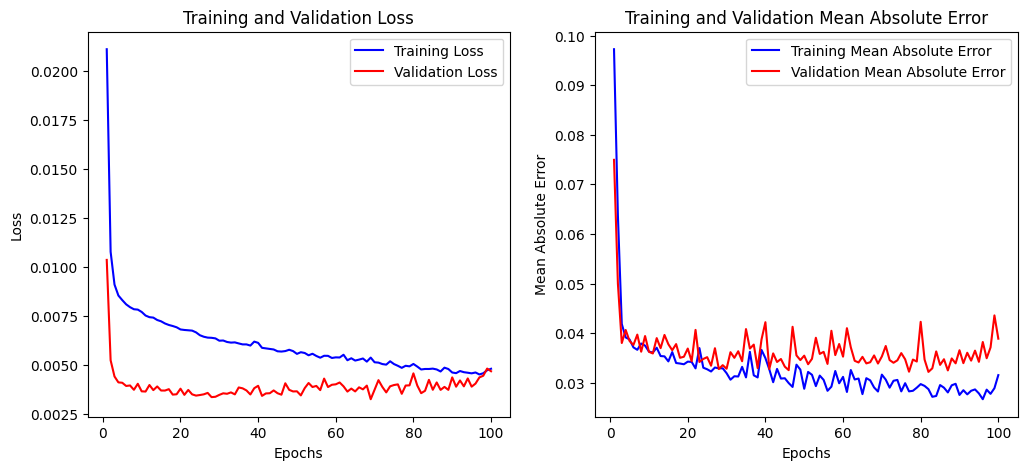

In [35]:
# Defining the model
forward_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(60, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model4.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward4 = forward_model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss4 = history_forward4.history['loss']
val_loss4 = history_forward4.history['val_loss']
metric4 = history_forward4.history['mean_absolute_error']
val_metric4 = history_forward4.history['val_mean_absolute_error']
epochs4 = range(1, len(loss4) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs4, loss4, 'b-', label='Training Loss')
plt.plot(epochs4, val_loss4, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs4, metric4, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs4, val_metric4, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [36]:
forward_model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0269


[0.002305861096829176, 0.026875276118516922]

### 2.1.6 Model with decreased learning rate, additional Dropout layer and additional Hidden layer

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0877 - val_loss: 0.0045 - val_mean_absolute_error: 0.0405
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0723 - val_loss: 0.0040 - val_mean_absolute_error: 0.0368
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0667 - val_loss: 0.0039 - val_mean_absolute_error: 0.0395
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0621 - val_loss: 0.0037 - val_mean_absolute_error: 0.0368
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0611 - val_loss: 0.0034 - val_mean_absolute_error: 0.0349
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0569 - val_loss: 0.0033 - val_mean_absolute_error: 0.0323
Epoch 7/100
13/13 [==

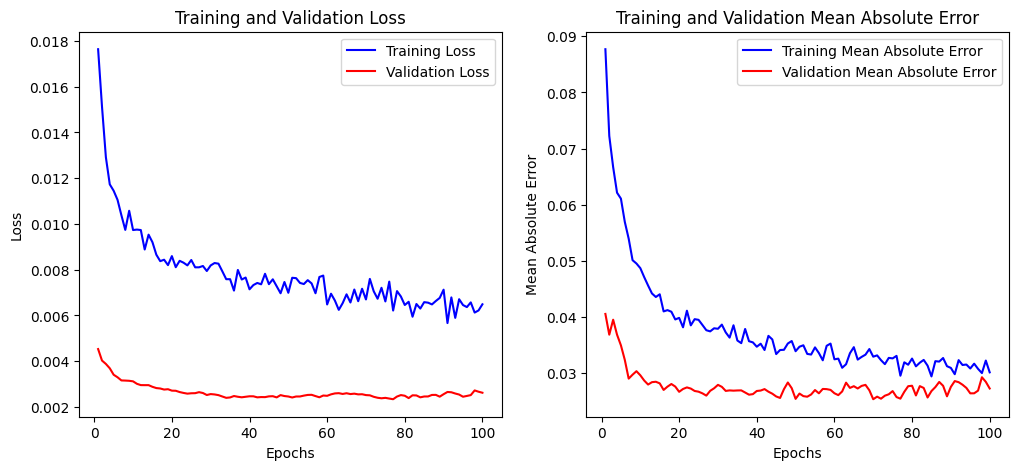

In [37]:
# Defining the model
forward_model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(60, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer2 = Adam(learning_rate=0.0005)
forward_model5.compile(optimizer=optimizer2,
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward5 = forward_model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss5 = history_forward5.history['loss']
val_loss5 = history_forward5.history['val_loss']
metric5 = history_forward5.history['mean_absolute_error']
val_metric5 = history_forward5.history['val_mean_absolute_error']
epochs5 = range(1, len(loss5) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs5, loss5, 'b-', label='Training Loss')
plt.plot(epochs5, val_loss5, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs5, metric5, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs5, val_metric5, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [38]:
forward_model5.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0201


[0.0018486636690795422, 0.020130854099988937]

### 2.1.7 Feature importances for the best performing forward looking ANN model

In [92]:
forward_weights = forward_model5.get_weights()

# Calculate feature importance as the sum of absolute weights for each feature
feature_importance_weights = np.sum(np.abs(forward_weights[0]), axis=1)

feature_importance_weights

array([8.191454, 8.165033, 9.12878 , 9.260663, 9.659689, 9.251195,
       9.238607, 8.05657 , 9.057095], dtype=float32)

In [99]:
for i in feature_importance_weights:
  print(i)

8.191454
8.165033
9.12878
9.260663
9.659689
9.251195
9.238607
8.05657
9.057095


In [93]:
for i in range(len(feature_importance_weights)):
  print('Feature {} has feature importance: {}'.format(X.columns[i], feature_importance_weights[i]))

Feature Area, acres has feature importance: 8.19145393371582
Feature Porosity, % has feature importance: 8.165033340454102
Feature Permeability, mD has feature importance: 9.128780364990234
Feature Depth, ft has feature importance: 9.260663032531738
Feature Gravity, °API has feature importance: 9.659688949584961
Feature Oil, cp has feature importance: 9.251194953918457
Feature Oil, °F has feature importance: 9.238607406616211
Feature Initial oil saturation, % has feature importance: 8.056570053100586
Feature End oil saturation, % has feature importance: 9.05709457397461


In [94]:
forward_model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 60)                600       
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_14 (Dense)            (None, 60)                3660      
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 122       
                                                                 
Total params: 4382 (17.12 KB)
Trainable params: 4382 (17.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2.2 Inverse design ANN

### 2.2.1 Original model

Epoch 1/100
13/13 [==============================] - 1s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0837 - val_loss: 0.0075 - val_mean_absolute_error: 0.0727
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0564 - val_loss: 0.0033 - val_mean_absolute_error: 0.0433
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0384 - val_loss: 0.0022 - val_mean_absolute_error: 0.0330
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0297 - val_loss: 0.0018 - val_mean_absolute_error: 0.0231
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0257 - val_loss: 0.0017 - val_mean_absolute_error: 0.0247
Epoch 6/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0235 - val_loss: 0.0015 - val_mean_absolute_error: 0.0208
Epoch 7/100
13/13 [

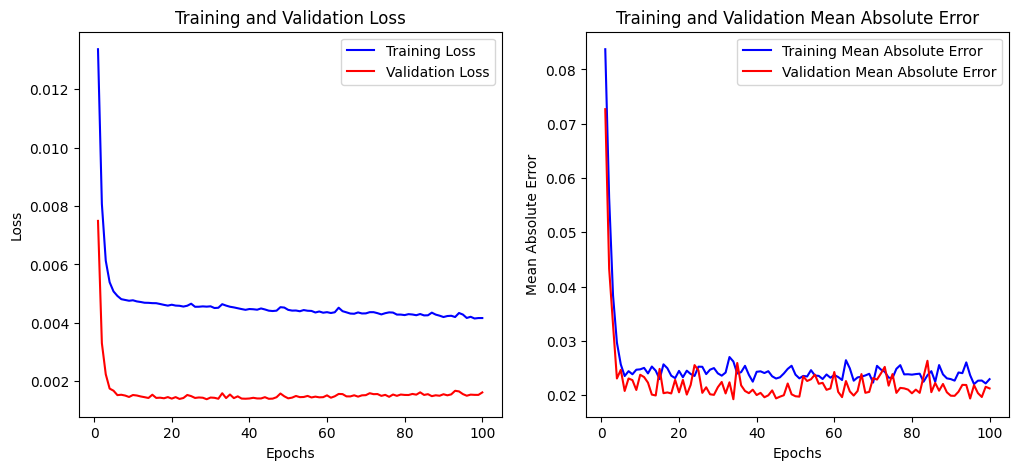

In [75]:
# redefining X and y according to new model
X1 = data[['Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y1 = data[['Production wells', 'Injection wells']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

# Defining the model
inverse_model = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse = inverse_model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss6 = history_inverse.history['loss']
val_loss6 = history_inverse.history['val_loss']
metric6 = history_inverse.history['mean_absolute_error']
val_metric6 = history_inverse.history['val_mean_absolute_error']
epochs6 = range(1, len(loss6) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs6, loss6, 'b-', label='Training Loss')
plt.plot(epochs6, val_loss6, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs6, metric6, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs6, val_metric6, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [76]:
inverse_model.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 8ms/step - loss: 9.2973e-04 - mean_absolute_error: 0.0201


[0.0009297337383031845, 0.020063111558556557]

### 2.2.2 Model with decreased learning rate

Epoch 1/100
13/13 [==============================] - 2s 39ms/step - loss: 0.0151 - mean_absolute_error: 0.0849 - val_loss: 0.0047 - val_mean_absolute_error: 0.0501
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0491 - val_loss: 0.0037 - val_mean_absolute_error: 0.0437
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0067 - mean_absolute_error: 0.0414 - val_loss: 0.0025 - val_mean_absolute_error: 0.0317
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0320 - val_loss: 0.0020 - val_mean_absolute_error: 0.0248
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0280 - val_loss: 0.0018 - val_mean_absolute_error: 0.0217
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0254 - val_loss: 0.0017 - val_mean_absolute_error: 0.0206
Epoch 7/100
13/13 [=

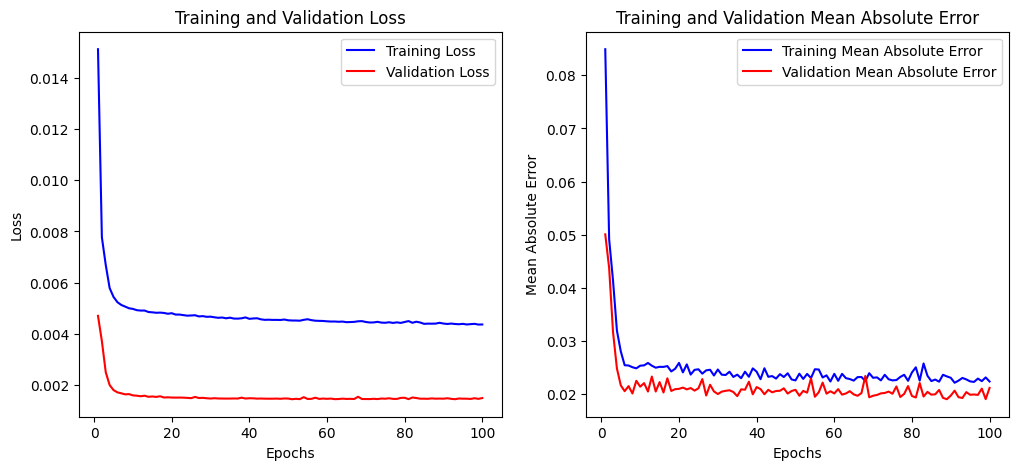

In [78]:
# Defining the model
inverse_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.0005)
inverse_model1.compile(optimizer=optimizer,
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse1 = inverse_model1.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss7 = history_inverse1.history['loss']
val_loss7 = history_inverse1.history['val_loss']
metric7 = history_inverse1.history['mean_absolute_error']
val_metric7 = history_inverse1.history['val_mean_absolute_error']
epochs7 = range(1, len(loss7) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs7, loss7, 'b-', label='Training Loss')
plt.plot(epochs7, val_loss7, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs7, metric7, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs7, val_metric7, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [79]:
inverse_model1.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 7ms/step - loss: 8.3254e-04 - mean_absolute_error: 0.0210


[0.0008325412054546177, 0.02101953700184822]

### 2.2.3 Model with increased learning rate

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.0071 - mean_absolute_error: 0.0457 - val_loss: 0.0028 - val_mean_absolute_error: 0.0419
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0319 - val_loss: 0.0020 - val_mean_absolute_error: 0.0336
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0299 - val_loss: 0.0018 - val_mean_absolute_error: 0.0314
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0272 - val_loss: 0.0015 - val_mean_absolute_error: 0.0221
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0270 - val_loss: 0.0014 - val_mean_absolute_error: 0.0207
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0241 - val_loss: 0.0015 - val_mean_absolute_error: 0.0237
Epoch 7/100
13/13 [==

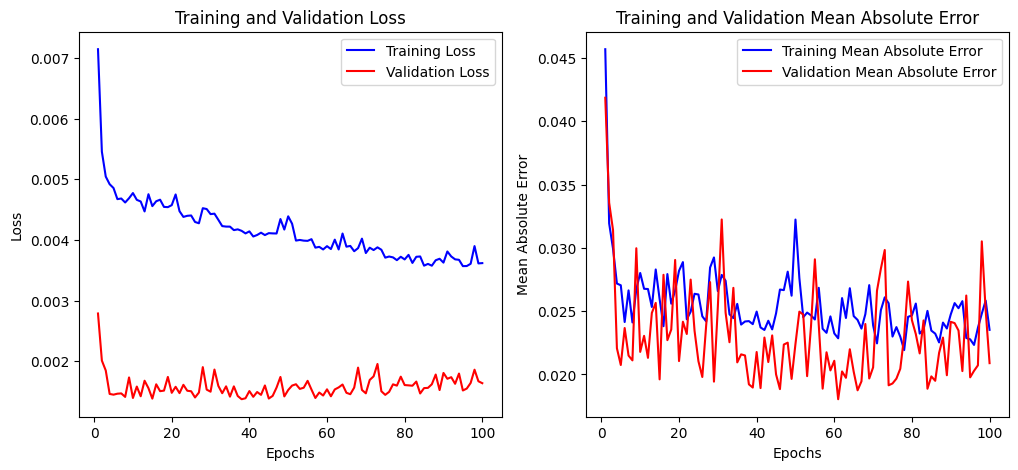

In [80]:
# Defining the model
inverse_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.005)
inverse_model2.compile(optimizer=optimizer,
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse2 = inverse_model2.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss8 = history_inverse2.history['loss']
val_loss8 = history_inverse2.history['val_loss']
metric8 = history_inverse2.history['mean_absolute_error']
val_metric8 = history_inverse2.history['val_mean_absolute_error']
epochs8 = range(1, len(loss8) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs8, loss8, 'b-', label='Training Loss')
plt.plot(epochs8, val_loss8, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs8, metric8, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs8, val_metric8, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [82]:
inverse_model2.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 10ms/step - loss: 8.1867e-04 - mean_absolute_error: 0.0189


[0.0008186697377823293, 0.018910400569438934]

### 2.2.4 Model with Dropout layer

Epoch 1/100
13/13 [==============================] - 2s 49ms/step - loss: 0.0355 - mean_absolute_error: 0.1460 - val_loss: 0.0050 - val_mean_absolute_error: 0.0539
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0160 - mean_absolute_error: 0.0908 - val_loss: 0.0045 - val_mean_absolute_error: 0.0530
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0785 - val_loss: 0.0023 - val_mean_absolute_error: 0.0324
Epoch 4/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0743 - val_loss: 0.0019 - val_mean_absolute_error: 0.0246
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0127 - mean_absolute_error: 0.0738 - val_loss: 0.0018 - val_mean_absolute_error: 0.0266
Epoch 6/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0099 - mean_absolute_error: 0.0642 - val_loss: 0.0018 - val_mean_absolute_error: 0.0237
Epoch 7/100
13/1

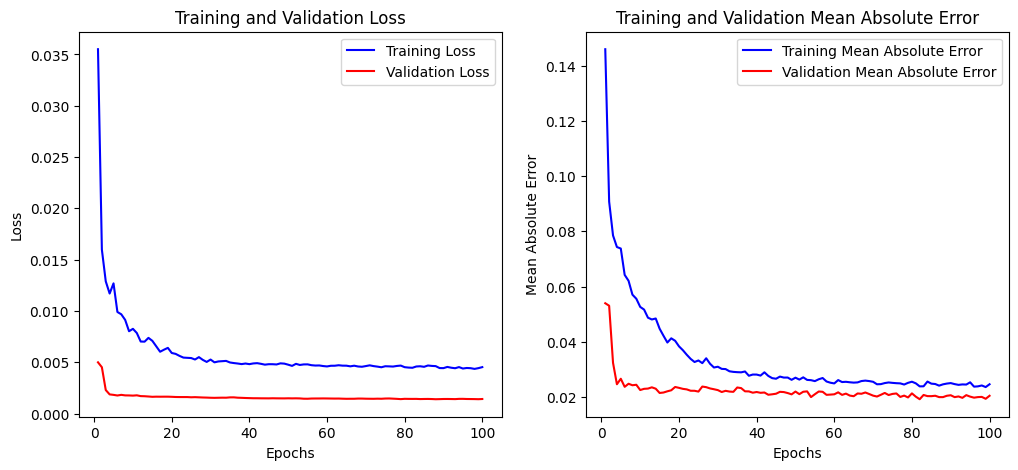

In [84]:
# Defining the model
inverse_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model3.compile(optimizer='adam',
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse3 = inverse_model3.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss9 = history_inverse3.history['loss']
val_loss9 = history_inverse3.history['val_loss']
metric9 = history_inverse3.history['mean_absolute_error']
val_metric9 = history_inverse3.history['val_mean_absolute_error']
epochs9 = range(1, len(loss9) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs9, loss9, 'b-', label='Training Loss')
plt.plot(epochs9, val_loss9, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs9, metric9, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs9, val_metric9, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [85]:
inverse_model3.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 6ms/step - loss: 7.2635e-04 - mean_absolute_error: 0.0188


[0.0007263508159667253, 0.018780428916215897]

### 2.2.5 Model with Additional Hidden Layer

Epoch 1/100
13/13 [==============================] - 2s 28ms/step - loss: 0.0060 - mean_absolute_error: 0.0335 - val_loss: 0.0017 - val_mean_absolute_error: 0.0274
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0286 - val_loss: 0.0016 - val_mean_absolute_error: 0.0217
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0236 - val_loss: 0.0015 - val_mean_absolute_error: 0.0199
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0255 - val_loss: 0.0015 - val_mean_absolute_error: 0.0203
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0261 - val_loss: 0.0015 - val_mean_absolute_error: 0.0234
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0228 - val_loss: 0.0014 - val_mean_absolute_error: 0.0198
Epoch 7/100
13/13 [==

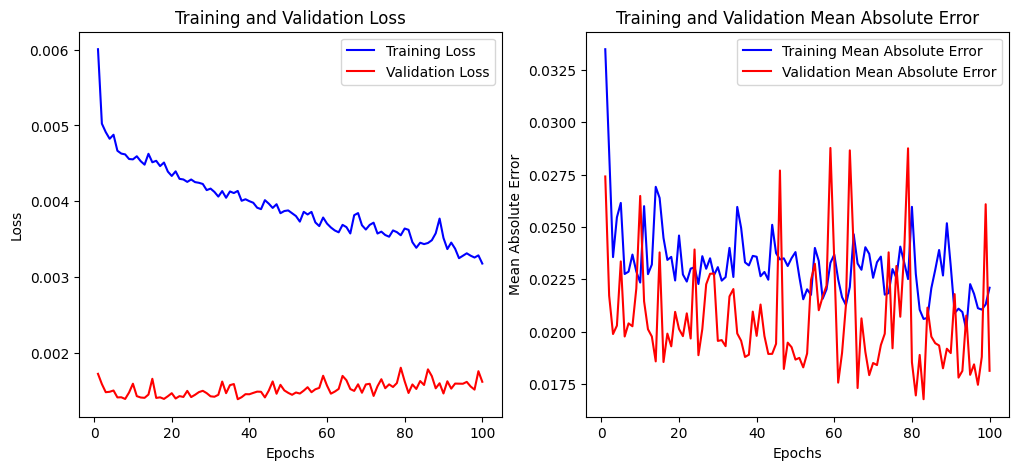

In [87]:
# Defining the model
inverse_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dense(75, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model4.compile(optimizer='adam',
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse4 = inverse_model4.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss10 = history_inverse4.history['loss']
val_loss10 = history_inverse4.history['val_loss']
metric10 = history_inverse4.history['mean_absolute_error']
val_metric10 = history_inverse4.history['val_mean_absolute_error']
epochs10 = range(1, len(loss10) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs10, loss10, 'b-', label='Training Loss')
plt.plot(epochs10, val_loss10, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs10, metric10, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs10, val_metric10, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()



In [88]:
inverse_model4.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 8ms/step - loss: 8.1966e-04 - mean_absolute_error: 0.0179


[0.000819663517177105, 0.01794569566845894]

### 2.2.6 Model with increased learning rate, additional Dropout layer and additional Hidden layer

Epoch 1/100
13/13 [==============================] - 2s 31ms/step - loss: 0.0159 - mean_absolute_error: 0.0857 - val_loss: 0.0019 - val_mean_absolute_error: 0.0256
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0611 - val_loss: 0.0015 - val_mean_absolute_error: 0.0197
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0496 - val_loss: 0.0016 - val_mean_absolute_error: 0.0217
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0066 - mean_absolute_error: 0.0422 - val_loss: 0.0015 - val_mean_absolute_error: 0.0205
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0364 - val_loss: 0.0015 - val_mean_absolute_error: 0.0200
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0057 - mean_absolute_error: 0.0342 - val_loss: 0.0015 - val_mean_absolute_error: 0.0220
Epoch 7/100
13/13

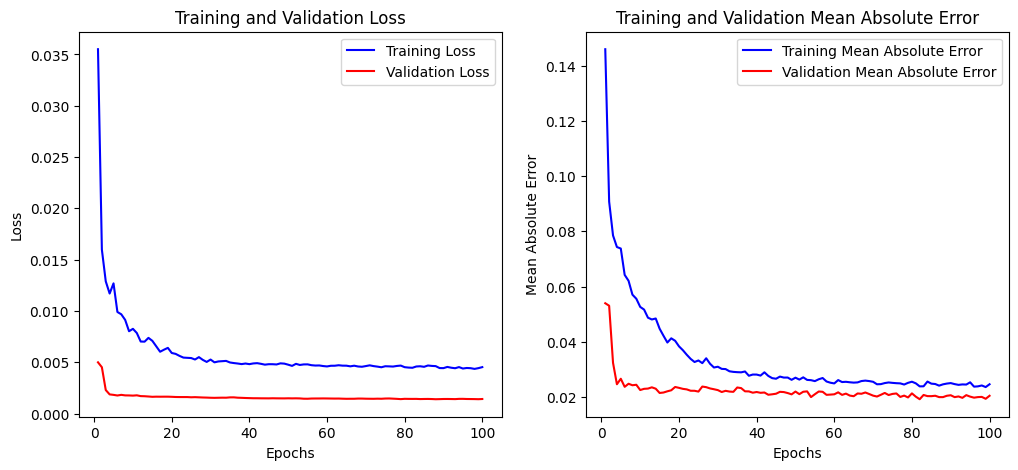

In [90]:
# Defining the model
inverse_model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(7,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(75, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.005)
inverse_model5.compile(optimizer='adam',
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse5 = inverse_model5.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss11 = history_inverse3.history['loss']
val_loss11 = history_inverse3.history['val_loss']
metric11 = history_inverse3.history['mean_absolute_error']
val_metric11 = history_inverse3.history['val_mean_absolute_error']
epochs11 = range(1, len(loss11) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs11, loss11, 'b-', label='Training Loss')
plt.plot(epochs11, val_loss11, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs11, metric11, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs11, val_metric11, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [91]:
inverse_model5.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 7ms/step - loss: 6.1793e-04 - mean_absolute_error: 0.0145


[0.0006179272895678878, 0.014515342190861702]

### 2.2.7 Feature importances for the best inverse design ANN model

In [95]:
inverse_weights = inverse_model5.get_weights()

# Calculate feature importance as the sum of absolute weights for each feature
feature_importance_weights2 = np.sum(np.abs(inverse_weights[0]), axis=1)

feature_importance_weights2

array([10.403721, 10.693703,  9.946156, 11.329239,  9.907521,  8.048957,
       10.026518], dtype=float32)

In [96]:
for i in feature_importance_weights2:
  print(i)

10.403721
10.693703
9.946156
11.329239
9.907521
8.048957
10.026518


In [100]:
for i in range(len(feature_importance_weights2)):
  print('Feature {} has feature importance: {}'.format(X1.columns[i], feature_importance_weights2[i]))

Feature Permeability, mD has feature importance: 10.40372085571289
Feature Depth, ft has feature importance: 10.693702697753906
Feature Gravity, °API has feature importance: 9.946155548095703
Feature Oil, cp has feature importance: 11.329238891601562
Feature Oil, °F has feature importance: 9.90752124786377
Feature Initial oil saturation, % has feature importance: 8.048956871032715
Feature End oil saturation, % has feature importance: 10.026517868041992


In [98]:
inverse_model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 75)                600       
                                                                 
 dropout_11 (Dropout)        (None, 75)                0         
                                                                 
 dense_55 (Dense)            (None, 75)                5700      
                                                                 
 dropout_12 (Dropout)        (None, 75)                0         
                                                                 
 dense_56 (Dense)            (None, 2)                 152       
                                                                 
Total params: 6452 (25.20 KB)
Trainable params: 6452 (25.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
